In [2]:
import pandas as pd
import numpy as np
from src import soporte_limpieza as sl
pd.set_option("display.max_columns",None)
pd.set_option('display.max_colwidth', None) # No cortar el contenido de las celdas
pd.options.display.float_format = '{:.2f}'.format

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_pickle("../11.Proyecto2_EDA-Ingresos-Publicos-Brasil/datos/datos-unidos.pkl")
df.sample()

,NOMBRE ÓRGANO SUPERIOR,CÓDIGO ÓRGANO,NOMBRE ÓRGANO,CÓDIGO UNIDAD GESTORA,NOMBRE UNIDAD GESTORA,CATEGORÍA ECONÓMICA,ORIGEN INGRESO,TIPO INGRESO,DETALLE,VALOR PREVISTO ACTUALIZADO,VALOR LANZADO,VALOR REALIZADO,PORCENTAJE REALIZADO,FECHA LANZAMIENTO,AÑO EJERCICIO
77222,Ministério da Educação,26271,Fundação Universidade de Brasília,154040,FUNDACAO UNIVERSIDADE DE BRASILIA - FUB,Receitas Correntes,Receita de Serviços,Serviços Administrativos e Comerciais Gerais,INSCR.EM CONCURSOS E PROC.SELETIVOS-PRINCIPAL,0.00,0.00,208.61,0.00,2016-07-06,2016


In [23]:
categorias_ingresos = df.groupby("CATEGORÍA ECONÓMICA")[["VALOR PREVISTO ACTUALIZADO","VALOR REALIZADO"]].sum()
categorias_ingresos["DIFERENCIA"] = categorias_ingresos["VALOR REALIZADO"] - categorias_ingresos["VALOR PREVISTO ACTUALIZADO"]
categorias_ingresos = categorias_ingresos.reset_index()
categorias_ingresos.sort_values(by="DIFERENCIA", ascending=False)

,CATEGORÍA ECONÓMICA,VALOR PREVISTO ACTUALIZADO,VALOR REALIZADO,DIFERENCIA
3,Receitas de Capital - intra-orçamentárias,10808411537.00,28250835724.33,17442424187.33
1,Receitas Correntes - intra-orçamentárias,291485025919.00,292651790699.89,1166764780.89
4,Sem informação,0.00,46.57,46.57
0,Receitas Correntes,13549526943206.14,12909343128909.43,-640183814296.71
2,Receitas de Capital,14485753431206.59,12407136680065.79,-2078616751140.80


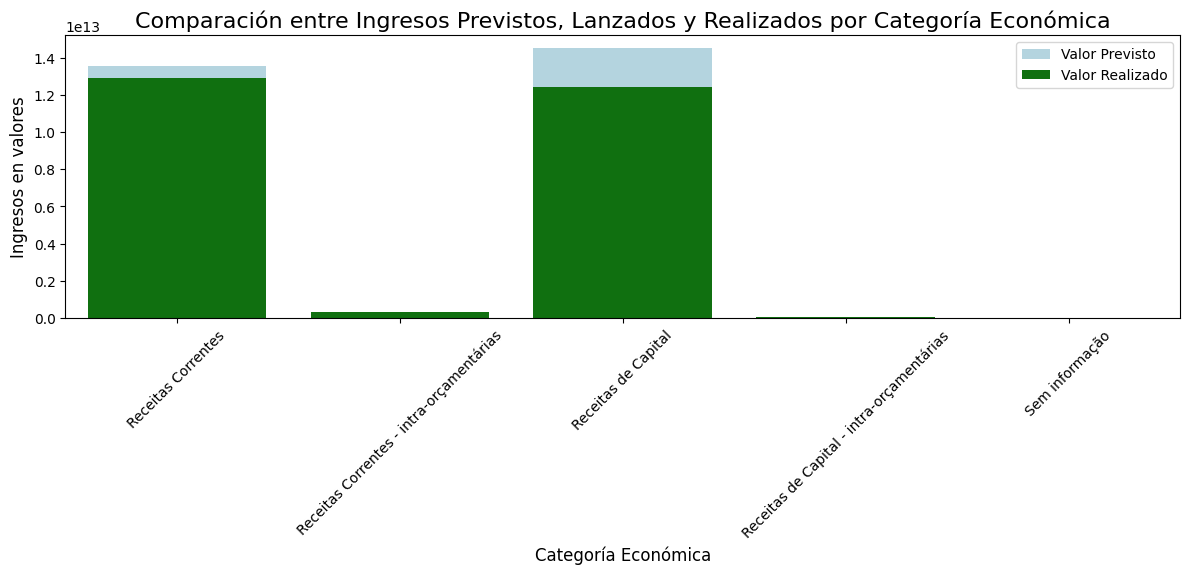

In [24]:
# Establecer el tamaño de la figura
plt.figure(figsize=(12, 6))

# Crear gráfico de barras
sns.barplot(x='CATEGORÍA ECONÓMICA', y='VALOR PREVISTO ACTUALIZADO', data=categorias_ingresos, color='lightblue', label='Valor Previsto')
sns.barplot(x='CATEGORÍA ECONÓMICA', y='VALOR REALIZADO', data=categorias_ingresos, color='green', label='Valor Realizado')

# Añadir etiquetas y título
plt.title('Comparación entre Ingresos Previstos, Lanzados y Realizados por Categoría Económica', fontsize=16)
plt.xlabel('Categoría Económica', fontsize=12)
plt.ylabel('Ingresos en valores', fontsize=12)
plt.xticks(rotation=45)  # Rotar las etiquetas del eje X para mayor legibilidad

# Mostrar el gráfico
plt.tight_layout()
plt.show()


In [15]:
tendencias_año = df.groupby("AÑO EJERCICIO")[["VALOR PREVISTO ACTUALIZADO","VALOR LANZADO","VALOR REALIZADO"]].sum()
tendencias_año = tendencias_año.reset_index()
tendencias_año["DIFERENCIA"] = tendencias_año["VALOR PREVISTO ACTUALIZADO"] - tendencias_año["VALOR REALIZADO"]
tendencias_año.sort_values(by="DIFERENCIA", ascending=False)

,AÑO EJERCICIO,VALOR PREVISTO ACTUALIZADO,VALOR LANZADO,VALOR REALIZADO,DIFERENCIA
4,2017,3414379614681.84,459897488081.78,2558047412866.96,856332201814.88
5,2018,3505648331810.28,468421184578.15,2942387872873.97,563260458936.31
8,2021,4180716471387.52,359788769214.59,3876372024873.04,304344446514.48
0,2013,2174650946322.04,1142556841623.94,1893613719099.78,281037227222.26
6,2019,3261378698948.11,343736377894.56,2991564738258.26,269813960689.85
2,2015,2878827555613.92,307296621471.69,2665685375159.13,213142180454.79
1,2014,2392129226119.23,1266561021071.51,2238551079327.88,153578146791.35
3,2016,2952696248075.54,325948228390.24,2839711583462.82,112984664612.72
7,2020,3577146718910.25,706480132443.07,3631448629524.17,-54301910613.92


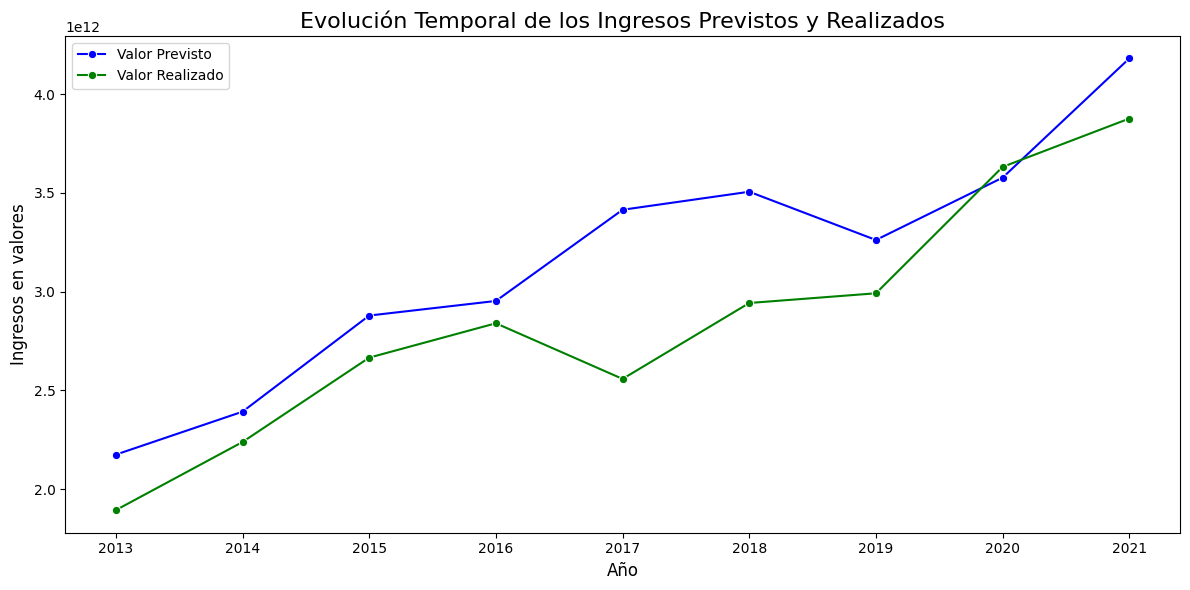

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Establecer el tamaño de la figura
plt.figure(figsize=(12, 6))

# Crear gráfico de líneas para los ingresos previstos y realizados
sns.lineplot(x='AÑO EJERCICIO', y='VALOR PREVISTO ACTUALIZADO', data=tendencias_año, label='Valor Previsto', marker='o', color='blue')
sns.lineplot(x='AÑO EJERCICIO', y='VALOR REALIZADO', data=tendencias_año, label='Valor Realizado', marker='o', color='green')

# Añadir etiquetas y título
plt.title('Evolución Temporal de los Ingresos Previstos y Realizados', fontsize=16)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Ingresos en valores', fontsize=12)

# Añadir leyenda
plt.legend()

# Mostrar el gráfico
plt.tight_layout()
plt.show()


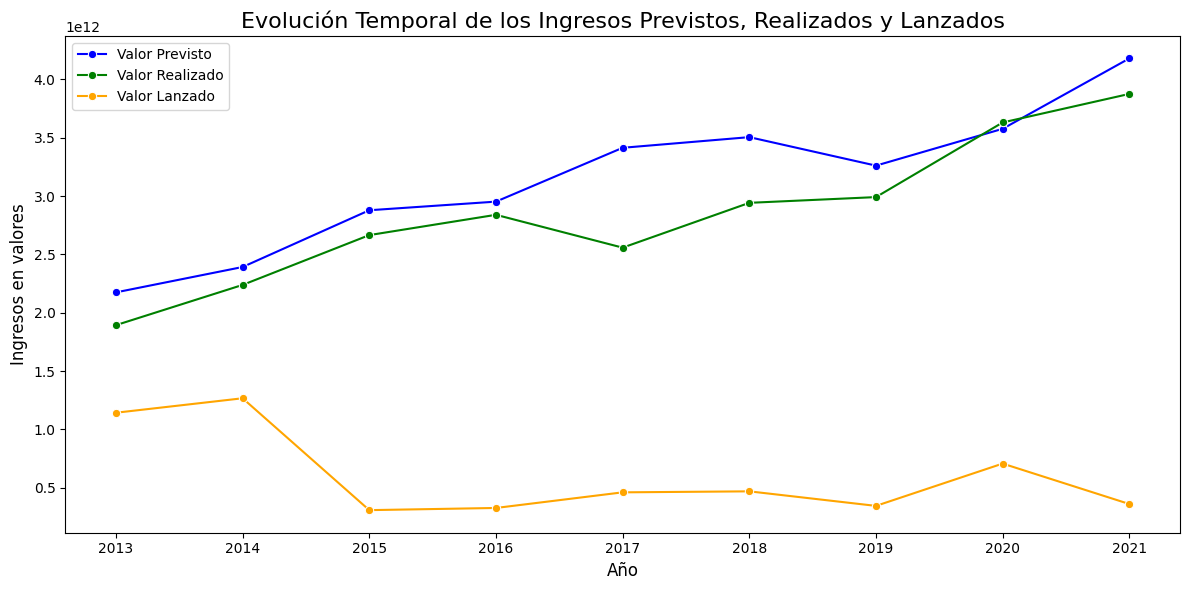

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Establecer el tamaño de la figura
plt.figure(figsize=(12, 6))

# Crear gráfico de líneas para los ingresos previstos, lanzados y realizados
sns.lineplot(x='AÑO EJERCICIO', y='VALOR PREVISTO ACTUALIZADO', data=tendencias_año, label='Valor Previsto', marker='o', color='blue')
sns.lineplot(x='AÑO EJERCICIO', y='VALOR REALIZADO', data=tendencias_año, label='Valor Realizado', marker='o', color='green')
sns.lineplot(x='AÑO EJERCICIO', y='VALOR LANZADO', data=tendencias_año, label='Valor Lanzado', marker='o', color='orange')

# Añadir etiquetas y título
plt.title('Evolución Temporal de los Ingresos Previstos, Realizados y Lanzados', fontsize=16)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Ingresos en valores', fontsize=12)

# Añadir leyenda
plt.legend()

# Mostrar el gráfico
plt.tight_layout()
plt.show()


In [18]:
df["MES"] = df["FECHA LANZAMIENTO"].dt.month_name()
df["MES_NUMERO"] = df["FECHA LANZAMIENTO"].dt.month
tendencias_mes = df.groupby(["MES", "MES_NUMERO"])[["VALOR PREVISTO ACTUALIZADO","VALOR LANZADO","VALOR REALIZADO"]].sum()
tendencias_mes.reset_index()
tendencias_mes["DIFERENCIA"] = tendencias_mes["VALOR PREVISTO ACTUALIZADO"] - tendencias_mes["VALOR REALIZADO"]
tendencias_mes.sort_values(by="MES_NUMERO", ascending=True)

,,VALOR PREVISTO ACTUALIZADO,VALOR LANZADO,VALOR REALIZADO,DIFERENCIA
MES,MES_NUMERO,,,,
January,1,16711007147653.00,15076064130.74,1933735689252.62,14777271458400.38
February,2,0.00,-23904264713.16,1195699037131.18,-1195699037131.18
March,3,0.00,10260220118.57,1666703302836.62,-1666703302836.62
April,4,4180716471387.52,644696348.51,1591284527803.02,2589431943584.50
May,5,0.00,53008836626.70,1282092166671.36,-1282092166671.36
June,6,49838878.54,2044446443449.22,1259371774462.61,-1259321935584.07
July,7,101407416.09,411290397497.71,1683137099845.77,-1683035692429.68
August,8,43637746.28,92572614076.49,1700053802235.86,-1700010164489.58
September,9,0.00,59935127566.93,1890279011080.10,-1890279011080.10


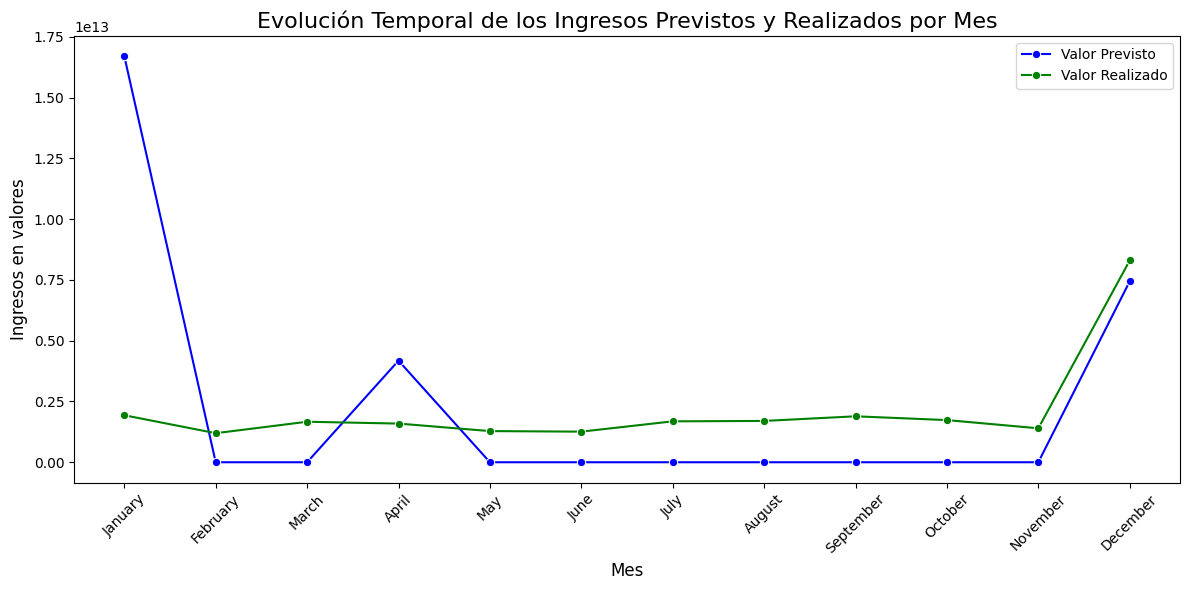

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ordenar los datos cronológicamente por MES_NUMERO
tendencias_mes = tendencias_mes.sort_values(by="MES_NUMERO", ascending=True)

# Establecer el tamaño de la figura
plt.figure(figsize=(12, 6))

# Crear gráfico de líneas para los ingresos previstos y realizados por mes
sns.lineplot(x='MES', y='VALOR PREVISTO ACTUALIZADO', data=tendencias_mes, label='Valor Previsto', marker='o', color='blue')
sns.lineplot(x='MES', y='VALOR REALIZADO', data=tendencias_mes, label='Valor Realizado', marker='o', color='green')

# Añadir etiquetas y título
plt.title('Evolución Temporal de los Ingresos Previstos y Realizados por Mes', fontsize=16)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Ingresos en valores', fontsize=12)

# Añadir leyenda
plt.legend()

# Rotar las etiquetas del eje X para mayor legibilidad si es necesario
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

